In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8n.pt")

In [5]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [6]:
img = "https://www.a2hosting.com/blog/content/uploads/2020/11/heavy-traffic.jpg"
results = model(img)


Found https://www.a2hosting.com/blog/content/uploads/2020/11/heavy-traffic.jpg locally at heavy-traffic.jpg
image 1/1 C:\Users\user\heavy-traffic.jpg: 448x640 51 cars, 1 bus, 1 truck, 89.2ms
Speed: 7.0ms preprocess, 89.2ms inference, 385.3ms postprocess per image at shape (1, 3, 448, 640)


In [7]:
type(results)

list

In [8]:
print(results[0].plot())

[[[64 51 29]
  [61 48 26]
  [58 44 26]
  ...
  [33 23  6]
  [30 21  8]
  [40 31 18]]

 [[63 51 27]
  [60 47 25]
  [57 43 24]
  ...
  [23 13  0]
  [22 13  0]
  [39 30 17]]

 [[64 53 26]
  [61 50 23]
  [59 47 23]
  ...
  [33 23  5]
  [30 21  7]
  [52 43 29]]

 ...

 [[76 54 13]
  [77 55 14]
  [78 56 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[77 55 13]
  [77 55 13]
  [78 56 14]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[78 56 14]
  [78 56 14]
  [79 57 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]]


<function matplotlib.pyplot.show(close=None, block=None)>

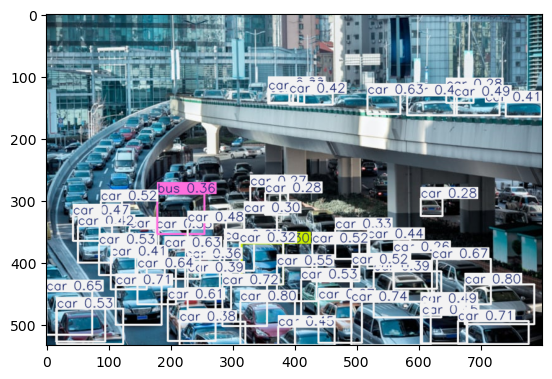

In [9]:
%matplotlib inline
plt.imshow(results[0].plot()[...,::-1])
plt.show

In [10]:
print(results[0].orig_img)

[[[64 51 29]
  [61 48 26]
  [58 44 26]
  ...
  [33 23  6]
  [30 21  8]
  [40 31 18]]

 [[63 51 27]
  [60 47 25]
  [57 43 24]
  ...
  [23 13  0]
  [22 13  0]
  [39 30 17]]

 [[64 53 26]
  [61 50 23]
  [59 47 23]
  ...
  [33 23  5]
  [30 21  7]
  [52 43 29]]

 ...

 [[76 54 13]
  [77 55 14]
  [78 56 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[77 55 13]
  [77 55 13]
  [78 56 14]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[78 56 14]
  [78 56 14]
  [79 57 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]]


In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow("YOLO", results[0].plot())
    
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 90.2ms
Speed: 1.0ms preprocess, 90.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0m


0: 480x640 1 cat, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cat, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cat, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 dog, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (


0: 480x640 2 persons, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 48

Speed: 1.0ms preprocess, 3.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 couch, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 couch, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 couch, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 couch, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 couch, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms pos

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 tvs, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 tvs, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no de


0: 480x640 1 backpack, 1 suitcase, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 cell phone, 7.5ms
Speed: 1.0ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 cell phone, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 chair, 1 cell phone, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess


0: 480x640 2 backpacks, 1 chair, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 backpack, 1 suitcase, 1 chair, 1 cell phone, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0


0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 0.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postpro


0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 5.5ms
Speed: 0.0ms preprocess, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image 


0: 480x640 1 couch, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 couch, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 couch, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 1 couch, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 1 couch, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 


0: 480x640 2 bottles, 1 tv, 5.5ms
Speed: 0.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 tv, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 tv, 1 cell phone, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 microwave, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 microwave, 4.0ms
Speed: 1.0ms prepro


0: 480x640 1 bottle, 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 1 mouse, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 mouse, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3,


0: 480x640 1 bottle, 1 cup, 1 cake, 1 tv, 1 keyboard, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cup, 1 cake, 1 keyboard, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cup, 1 cake, 1 keyboard, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 cup, 1 cake, 1 tv, 1 keyboard, 3.0ms
Speed: 1.5ms preprocess, 3.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 cup, 1 cake, 1 tv, 1 keyboard, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 cup, 1 cake, 1 tv, 1 keyboard, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 cup, 1 cake, 1 tv, 1 keyboard, 4.0ms
Speed: 1.0ms preprocess, 4.0m


0: 480x640 1 bottle, 2 cups, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 1 cake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 cups, 4.0ms
Speed: 1.0ms preprocess, 4.0ms i


0: 480x640 1 bottle, 1 tv, 2 microwaves, 6.4ms
Speed: 1.0ms preprocess, 6.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 tv, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 2 microwaves, 2 ovens, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 2 microwaves, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x64


0: 480x640 2 bottles, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 2 microwaves, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 bottles, 1 tv, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 bottles, 1 tv, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 bottles, 1 tv, 2 microwaves, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 bottles, 1 tv, 2 microwaves, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0:


0: 480x640 2 bottles, 1 tv, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 bottles, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 6

Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bus, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bus, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bus, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bus, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections)


0: 480x640 1 suitcase, 1 bottle, 1 chair, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 chair, 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bed, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bed, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 0.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms 

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 books, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 books, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 2 books, 3.9ms
Speed: 1.0ms preprocess, 3.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 books, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 2 books, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 2 books, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 3 books, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per ima


0: 480x640 1 bottle, 1 bowl, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 1 remote, 2 books, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 3 books, 5.2ms
Speed: 1.0ms preprocess, 5.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 book, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 book, 7.0ms
Speed: 1.0ms preprocess,

Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bowl, 1 book, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bowl, 1 remote, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bowl, 1 remote, 1 book, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bowl, 1 book, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bowl, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 2 books, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 2 books, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms 

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 2 books, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 bowl, 3 books, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 microwave, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 microwave, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bowl, 2 books, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bottle, 1 book, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per


0: 480x640 1 suitcase, 1 bottle, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 8.5ms
Speed: 1.0ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 1 bed, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 1 bed, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 bottle, 

Speed: 1.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bed, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 64


0: 480x640 1 chair, 1 clock, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 chair, 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 handbag, 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 suitcase, 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 clock, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms


0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 clock, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 clock, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per 


0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tv, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1


0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 toilet, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postpro


0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms 


0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms 


0: 480x640 1 toothbrush, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tie, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 tie, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 toothbrush, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 toothbrush, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 refrigerator, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape


0: 480x640 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms 


0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms 


0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms 